<h1 style="text-align:center"> Self Driving Car </h1>

<h3>Introduction</h3>

In this project, I will show how to program a self-driving car using <b>Deep Learning</b>, that is to say, steering of the car will not involve human intervention. <br> 
For that we are going to use Udacity's simulator which was built using <a href="https://unity3d.com/fr"> Unity</a>.<br>
For those interested, the link for the simulator is the following one : <a href="https://github.com/udacity/self-driving-car-sim">Car simulator </a>

<img src="sim_image.png" alt="Udacity simulator" width="75%" height="75%">

<h3>Importing libraries</h3>

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import os # Command-line 
 
import pandas as pd # DataFrame manipulation
import numpy as np # Statistical tools

import scipy

# Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline  

# Image processing
import cv2
from PIL import Image

# Train/Test set split using Scikit-Learn
from sklearn.model_selection import train_test_split

# Making output consistent with fixed seed
import random
random.seed(11)

In [2]:
# Tensorflow
import tensorflow as tf

# Keras
from keras import layers
from keras.models import Sequential 
from keras.models import model_from_json
from keras.layers import Input, Dense, Lambda, Cropping2D, ELU, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.regularizers import l2



Using TensorFlow backend.


In [3]:
import keras

print(keras.__version__ )

2.1.2


<h3>Loading data generated</h3>

In [4]:
DATA_PATH = "car_data/"
# DATA_PATH = "car_data/Track_2"

def fetch_data(data_path=DATA_PATH):
    try:
        names = ['center', 'left', 'right', 
                 'steering_angle', 'throttle', 'brake', 'speed'] 
        csv_path = os.path.join(DATA_PATH, "driving_log.csv")
        data = pd.read_csv(csv_path, names=names)
        return data
    except:
        print("Could not find csv file")

In [5]:
data = fetch_data()
data.head()

,center,left,right,steering_angle,throttle,brake,speed
0,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,0.0,1.0,0,30.19032
1,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,0.0,1.0,0,30.19030
2,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,-0.2,1.0,0,30.18018
3,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,0.0,1.0,0,30.19070
4,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,C:\Users\Melan\Desktop\Car_project\car_data\IM...,0.0,1.0,0,30.18985


In [6]:
data.dtypes

center             object
left               object
right              object
steering_angle    float64
throttle          float64
brake               int64
speed             float64
dtype: object

<h3>Preprocessing</h3>

The generated data comes from a Windows computer and this program will be used on a Linux computer to train the data. <br>
As such, the directory images of the center, left and right cameras need to be changed.

In [7]:
# Linux path
# PATH_IMG = '/home/lamel/Documents/Car_project/self-driving/car_data/IMG/'

# Windows path
# PATH_IMG = '/Users/Melan/Desktop/Car_project/car_data/IMG/'
# PATH_IMG = '/Users/Melan/Desktop/Car_project/car_data/Track_2/IMG/' # Track 2


# AWS path
PATH_IMG = '/home/ubuntu/car_project/car_data/IMG/'

In [8]:
def center_camera_path_change(data):
    for center in data['center']:
        data['center'] = PATH_IMG + center[-34:]

def left_camera_path_change(data):
    for left in data['left']:
        data['left'] = PATH_IMG + left[-32:]
        
def right_camera_path_change(data):
    for right in data['right']:
        data['right'] = PATH_IMG + right[-33:]

In [9]:
center_camera_path_change(data)
left_camera_path_change(data)
right_camera_path_change(data)

In [10]:
data.head()

,center,left,right,steering_angle,throttle,brake,speed
0,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19032
1,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19030
2,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,-0.2,1.0,0,30.18018
3,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19070
4,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.18985


In [11]:
data.tail()

,center,left,right,steering_angle,throttle,brake,speed
24479,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.000000,0,30.19016
24480,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.000000,0,30.19027
24481,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.000000,0,30.19029
24482,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,0.950995,0,30.19033
24483,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,0.414338,0,25.92301


Quick sanity check that images have the expected file path:

In [12]:
print(data['center'][0])
print(data['left'][0])
print(data['right'][0])

/home/ubuntu/car_project/car_data/IMG/center_2018_01_13_11_06_46_073.jpg
/home/ubuntu/car_project/car_data/IMG/left_2018_01_13_11_06_46_073.jpg
/home/ubuntu/car_project/car_data/IMG/right_2018_01_13_11_06_46_073.jpg


<h3>Peek at the camera images</h3>

Let's take a look and verify that the images' path are indeed images and show them.

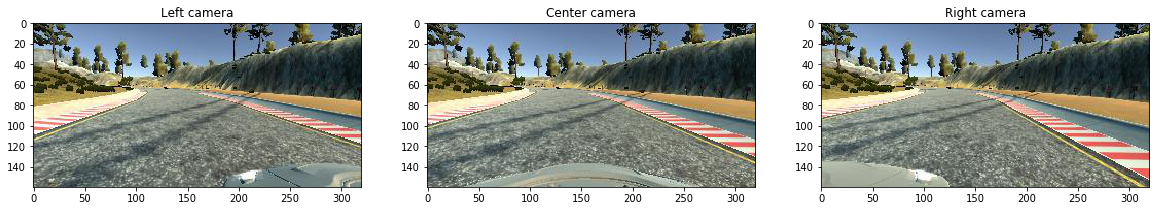

In [13]:
img_1 = data['center'][0]
img_center = Image.open(img_1)

img_2 = data['left'][1]
img_left = Image.open(img_2)

img_3 = data['right'][2]
img_right = Image.open(img_3)

plt.figure(1, figsize=(20, 12))
plt.subplot(332)
plt.title('Center camera')
plt.imshow(img_center)

plt.subplot(331)
plt.title('Left camera')
plt.imshow(img_left)

plt.subplot(333)
plt.title('Right camera')
plt.imshow(img_right)

plt.show()

<h3>Observation of steering angle distribution</h3> 

We need to have an intuition about the values we are trying to predict, that is to say the steering angle.<br>
For that, we will plot the histogram of the angles reported in the dataset.

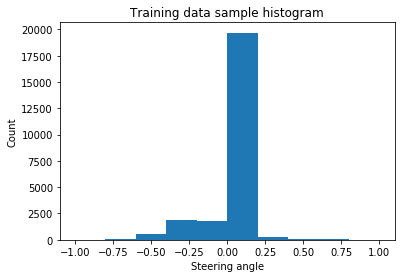

In [14]:
plt.hist(data['steering_angle'])
plt.title("Training data sample histogram")
plt.xlabel("Steering angle")
plt.ylabel("Count")
plt.show()

<u>Observation:</u> <br>
Because the test track includes long sections with very slight or no curvature, the data captured from it tends to be heavily skewed toward low and zero turning angles. This creates a problem for the neural network, which then becomes biased toward driving in a straight line and can become easily confused by sharp turns.

<h3>Using side cameras</h3>

If you only use the center camera pictures your car will soon leave the track and crash. This is due to the fact that when recording only the ideal driving path, it will not know what to do when being slightly off. <br>
To tackle this issue, I decided to use the side camera images and simulate recovery paths

In [15]:
data['steering_angle_right'] = data['steering_angle'] - 0.25
data['steering_angle_left'] = data['steering_angle'] + 0.25
data.head()

,center,left,right,steering_angle,throttle,brake,speed,steering_angle_right,steering_angle_left
0,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19032,-0.25,0.25
1,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19030,-0.25,0.25
2,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,-0.2,1.0,0,30.18018,-0.45,0.05
3,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.19070,-0.25,0.25
4,/home/ubuntu/car_project/car_data/IMG/center_2...,/home/ubuntu/car_project/car_data/IMG/left_201...,/home/ubuntu/car_project/car_data/IMG/right_20...,0.0,1.0,0,30.18985,-0.25,0.25


<h3>Split the dataset</h3>

Now we will split the data into the X features and Y labels (steering angle) and
return the train and validation set

In [16]:
def split_train_validation(data, valid_ratio):
    # We store the camerage images as our input data
#     X = data[['center', 'left', 'right']].values
    X = np.concatenate(
        (data['center'].values , data['left'].values, data['right'].values)
    )
    # Steering angle is what we want to predict
    y = np.concatenate(
        (data['steering_angle'].values , data['steering_angle_left'].values, data['steering_angle_right'].values)
    )
    
    # Split into training/test set 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_ratio, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [17]:
X_train, X_valid, y_train, y_valid = split_train_validation(data, 0.05)
print("X_train.shape:", X_train.shape, "; X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape, "; y_valid.shape:", y_valid.shape)

X_train.shape: (69779,) ; X_valid.shape: (3673,)
y_train.shape: (69779,) ; y_valid.shape: (3673,)


<h3>Extract images 4D tensor</h3>

We're going to convert the X_train & X_valid name paths to <i>ndarray</i>

In [18]:
def extract_4DTensor_images(X):
    X = np.array([cv2.imread(X[i]) 
                  for i in range(X.shape[0])
    ])
    
    return X

In [19]:
X_train = extract_4DTensor_images(X_train)
X_valid = extract_4DTensor_images(X_valid)

In [20]:
print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)

X_train.shape: (69779, 160, 320, 3)
X_valid.shape: (3673, 160, 320, 3)


<h3>Brightness augmentation data </h3> 

We will alter the brightness of the camera images. That will allows the car to not lose track even in night time conditions. <br>
To do that, we convert the RGB image to HSV (Hue Saturation Value) and change the V (Value or Brightness) channel by a random number.  

In [21]:
def random_brightness(image):
    """Function used to add random brightness to camera images"""
    # Convert to HSV
    image_out = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Create random brightness value
    random_brightness = 0.25 + np.random.uniform()
    # Multiply this value by th 3rd channel (i.e. 2 in python since index starts at 0) 
    image_out[:, :, 2] = image_out[:, :, 2] * random_brightness
    # Convert the image back to RGB
    image_out = cv2.cvtColor(image_out, cv2.COLOR_HSV2RGB)
    
    return image_out

Test of the function: 

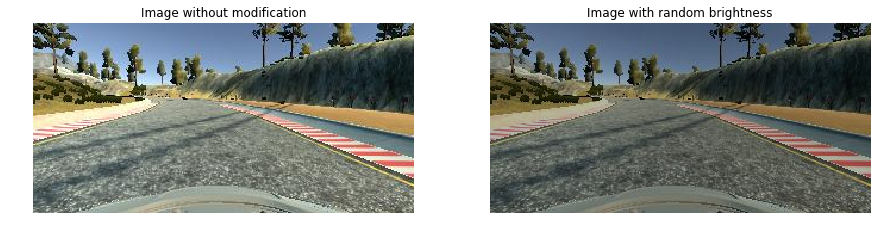

In [22]:
plt.figure(2, figsize=(15, 12))

img = X_train[0]
plt.subplot(221)
# Note : OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!
# This means that images are actually represented in BGR order rather than RGB!
plt.title("Image without modification")
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(222)
img_brightness = random_brightness(img)
plt.title("Image with random brightness")
plt.axis("off")
plt.imshow(cv2.cvtColor(img_brightness, cv2.COLOR_BGR2RGB))

plt.show()

In [23]:
X_bright = []
y_bright = []

for i in range((X_train.shape)[0]):
    img = random_brightness(X_train[i])
    X_bright.append(img)
    y_bright.append(y_train[i])
    
X_train = np.concatenate((X_train, X_bright))
y_train = np.concatenate((y_train, y_bright))

X_train.shape, y_train.shape

((139558, 160, 320, 3), (139558,))

In [24]:
X_bright = []
y_bright = []

for i in range((X_valid.shape)[0]):
    img = random_brightness(X_valid[i])
    X_bright.append(img)
    y_bright.append(y_valid[i])
    
X_valid = np.concatenate((X_valid, X_bright))
y_valid = np.concatenate((y_valid, y_bright))

X_valid.shape, y_valid.shape

((7346, 160, 320, 3), (7346,))

<h3>Shifting images</h3>

I next shifted camera images to left and right to simulate the effect of the car at different positions in the lane. To simulate lane shifts, I applied random shifts in horizontal direction of upto 10 pixels, and applied angle change of .2 per pixel.

In [25]:
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 10*np.random.uniform()-10/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,((image.shape)[1],(image.shape)[0]))

    return image_tr,steer_ang,tr_x

Test of the function : 

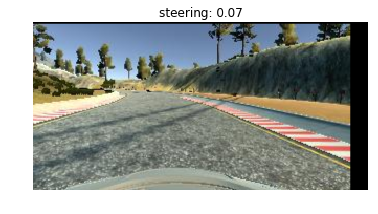

In [26]:
image_tr, steer_ang, tr_x = trans_image(X_train[0], y_train[0], 80)
plt.title('steering: ' + str(np.round(steer_ang,2)) )
plt.imshow(cv2.cvtColor(image_tr, cv2.COLOR_BGR2RGB))
plt.axis('off');

In [27]:
X_shift = []
y_shift = []

for i in range((X_train.shape)[0]):
# for i in range(100):
    image_tr, steer_ang, tr_x = trans_image(X_train[i], y_train[i], 150)
    X_shift.append(image_tr)
    y_shift.append(steer_ang)

X_train = np.concatenate((X_train, X_shift))
y_train = np.concatenate((y_train, y_shift))

X_train.shape, y_train.shape

((279116, 160, 320, 3), (279116,))

In [28]:
X_shift = []
y_shift = []

for i in range((X_valid.shape)[0]):
# for i in range(100):
    image_tr, steer_ang, tr_x = trans_image(X_valid[i], y_valid[i], 150)
    X_shift.append(image_tr)
    y_shift.append(steer_ang)

X_valid = np.concatenate((X_valid, X_shift))
y_valid = np.concatenate((y_valid, y_shift))

X_valid.shape, y_valid.shape

((14692, 160, 320, 3), (14692,))

<h3>Converting to YUV planes</h3>

Before passing the images to the network, we will split them into YUV planes.
Note that cv2 process RGB images as multi-dimensionnal NumPy arrays but in reverse; that is to say BGR images. Thus, the appropriate function to be used
is cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

In [29]:
def convert_YUV(X):
#     X = [cv2.cvtColor(X[i], cv2.COLOR_BGR2YUV) 
#          for i in range(X.shape[0])
#         ]
    for i in range(X.shape[0]):
        img = cv2.cvtColor(X[i], cv2.COLOR_BGR2YUV)
        X[i] = img
    
    return X

In [30]:
X_train = convert_YUV(X_train)
X_valid = convert_YUV(X_valid)

In [31]:
X_train.shape, X_valid.shape

((279116, 160, 320, 3), (14692, 160, 320, 3))

One may wonder what a YUV image may looks like:  

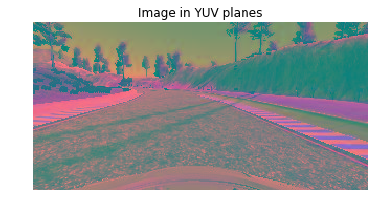

In [32]:
img = X_train[0]
plt.title("Image in YUV planes")
plt.axis("off")
plt.imshow(img)
plt.show()

<h3>Saving data (Checkpoint)</h3>

In [33]:
import h5py

# Saving into h5 file

# with h5py.File('X_train.h5') as hf:
#     hf.create_dataset('X_train', data=X_train)

# with h5py.File('y_train.h5') as hf:
#     hf.create_dataset('y_train', data=y_train)

# with h5py.File('X_test.h5') as hf:
#     hf.create_dataset('X_valid', data=X_valid)

# with h5py.File('y_test.h5') as hf:
#     hf.create_dataset('y_valid', data=y_valid)

<h3>Building model</h3>

For the training, I will be using the one that NVidia depicted in their paper: <br> 
<b>End to End Learning for Self-Driving Cars</b> 25 April 2016 : <a href="https://arxiv.org/abs/1604.07316.pdf"> ArXiv paper</a>

In [34]:
# Helper function
def resize(image):
    import tensorflow as tf
    
    return tf.image.resize_images(image, [66, 200])

In [35]:
def build_model(input_shape = (160, 320, 3)):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape, name="Main_input")
    
    # Crop 70 pixels from the top of the image and 25 from the bottom (function: Cropping2D(cropping=((top_crop, bottom_crop), (left_crop, right_crop)))
    X = Cropping2D(cropping=((70, 25), (0, 0)), name="Cropping2D")(X_input)
    
    # Resize data by using Lambda 
    # Lambda Wraps arbitrary expression as a Layer object.
    X = Lambda(resize, name="resize", input_shape=(160, 320, 3), output_shape=(66, 200, 3))(X)   
    
    # Normalize input
    X = Lambda(lambda x: (x/127.5) - 0.5, name="normalize")(X)
    
    # 1st CONV layer: (5x5) kernel, (2x2) strides, 24 filters, no pad
    X = Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv1", kernel_regularizer=l2(0.01))(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X) 
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # 2nd CONV layer: (5x5) kernel, (2x2) strides, 36 filters, no pad
    X = Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv2")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)    
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # 3rd CONV layer: (5x5) kernel, (2x2) strides, 48 filters, no pad
    X = Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv3")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # 4th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv4")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)    
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # 5th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv5")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # Flatten 
    X = Flatten()(X)
    
    # Fully Connected layer 1: 100 units, 
    # Activation: ELU (this helps alleviate the vanishing gradient problem) 
    X = Dense(100, activation='elu', name="fully_connected_1")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)
    # Dropout for regularization
    X = Dropout(0.2)(X)    
    
    # Fully Connected layer 2: 50 units, Activation: ELU
    X = Dense(50, activation='elu', name="fully_connected_2")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # Fully Connected layer 3: 10 units, Activation: ELU
    X = Dense(10, activation='elu', name="fully_connected_3")(X)
    # Add non linearity with Exponential Linear Unit (ELU)
    X = ELU()(X)
    # Dropout for regularization
    X = Dropout(0.2)(X)
    
    # Output layer
    X = Dense(1, name="output")(X)
    
    # Create model 
    model = Model(inputs = X_input, outputs = X, name='NVidia ConvNet')
    
    return model 

In [36]:
model = build_model()

We can take a peek at the overall structure we just made by calling the method <i>summary()</i>:

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Main_input (InputLayer)      (None, 160, 320, 3)       0         
_________________________________________________________________
Cropping2D (Cropping2D)      (None, 65, 320, 3)        0         
_________________________________________________________________
resize (Lambda)              (None, 66, 200, 3)        0         
_________________________________________________________________
normalize (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 31, 98, 24)        1824      
_________________________________________________________________
elu_1 (ELU)                  (None, 31, 98, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 98, 24)        0         
__________

<u>Note</u>: <br>
When we transition from the last convolutional layer (<b>Conv5</b>) to the <b>Flatten</b> operation, there is 1152 units and not 1164 as depicted in the paper. 

<h3>Compile model</h3>

We can now compile the model to configure the learning process. <br>
The arguments of <i>compile()</i> has to be chosen wisely.
The <i>compile()</i> method receives three arguments:
<ul>
    <li>An <u>optimizer</u>: We will chose Adam (Adaptive Momentum) </li>
    <li>A <u>loss function</u>: As we predict a steering angle, the most efficient one for our problem is definitely the mean squared error (mse)</li>
    <li>A list of <u>metrics</u>: A metric is a function that is used to judge the performance of your model. We don't necessarily need one here.</li>

</ul>

In [38]:
adam = Adam(lr=1e-4)

model.compile(optimizer=adam, \
              loss='mean_squared_error', 
              metrics=['mae'])

<h3>Fit the model</h3>

We can at least train the model ! <br>
<i>fit()</i>: Trains the model for a fixed number of epochs (iterations on a dataset).

In [39]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=2048)

Train on 279116 samples, validate on 14692 samples
Epoch 1/10
279116/279116 [==============================] - 543s 2ms/step - loss: 0.1401 - mean_absolute_error: 0.2283 - val_loss: 0.0784 - val_mean_absolute_error: 0.1291
Epoch 2/10
279116/279116 [==============================] - 541s 2ms/step - loss: 0.0890 - mean_absolute_error: 0.1553 - val_loss: 0.0693 - val_mean_absolute_error: 0.1127
Epoch 3/10
279116/279116 [==============================] - 541s 2ms/step - loss: 0.0771 - mean_absolute_error: 0.1372 - val_loss: 0.0624 - val_mean_absolute_error: 0.1031
Epoch 4/10
279116/279116 [==============================] - 540s 2ms/step - loss: 0.0689 - mean_absolute_error: 0.1274 - val_loss: 0.0570 - val_mean_absolute_error: 0.0993
Epoch 5/10
279116/279116 [==============================] - 541s 2ms/step - loss: 0.0628 - mean_absolute_error: 0.1214 - val_loss: 0.0522 - val_mean_absolute_error: 0.0960
Epoch 6/10
279116/279116 [==============================] - 541s 2ms/step - loss: 0.0575 

<h3>Saving model to disk</h3>

Keras provides the ability to
describe any model using JSON format with a <b>to_json()</b> function. This can be saved to file
and later loaded via the model <b>from_json()</b> function that will create a new model from the
JSON specification. <br>

The weights are saved directly from the model using the <b>save_weights()</b> function and
later loaded using the symmetrical <b>load_weights()</b> function.

In [40]:
# Serialize model to JSON

model_json = model.to_json()
with open("model_nvidia.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialize weights to HDF5

model.save_weights("model_nvidia.h5")
print("Saved model to disk")

Saved model to disk
